<a href="https://colab.research.google.com/github/abdulkadirdemirci/abdulkadirdemirci/blob/main/PCA(temel_bilesen_analizi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA ( TEMEL BİLEŞEN ANALİZİ )

## Kütüphaneler ve Veri import

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler

In [14]:
df=pd.read_csv("/content/drive/MyDrive/veriler/USArrests.csv")

In [ ]:
df.head()

In [17]:
df.index=df.iloc[:,0]
df=df.iloc[:,1:5]
df.index.name=None

## Standartlaştırma

In [19]:
df=StandardScaler().fit_transform(df)

In [23]:
df[0:10]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293]])

## PCA Uygulama

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca=PCA(n_components=2)

In [27]:
pca_fit=pca.fit_transform(df)

In [28]:
bilesen_df=pd.DataFrame(data=pca_fit,columns=["first_component","second_component"])

In [29]:
bilesen_df.head()

,first_component,second_component
0,0.985566,1.133392
1,1.950138,1.073213
2,1.763164,-0.745957
3,-0.141420,1.119797
4,2.523980,-1.542934


*yukarıda gördüğümüz iki bileşen verinin önceki halindeki 
murder, assault, urban_pop, rape değişkenlerini temsil ediyor. 4 bilşeni 2 bileşene indirgedik*

In [31]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random

ikiye indirgedğimiz yeni bileşenlerin veri setindeki varyansı açıklama oranına erişmek istersek

In [33]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129])

1. bileşen verisetindeki varyansı %62 oranında açıklarken, 2. bileşin .24 oranında açıklıyor.

ikisinin toplamı %87 yapıyor bu iki bileşen 4 değişkenin temsil ettiği değişkenliği %87 oranında temsil ediyor. %13lük temsil kaybı sözkonusu

## optimum bileşen sayısını belirleme

diyelimki 10larca degişkene sahip bir verimiz var ve pca yöntemini kullanarak kaç bileşene düşürecegimize karar vermek için açıklanan veriance oranı bilgisini yani ( .explained_variance_ratio_) kullanacagız ve bunu grafik üzerinde görüp karar vermek istiyoruz.

In [35]:
import matplotlib.pyplot as plt

In [39]:
pca=PCA().fit(df)

(0.0, 4.0)

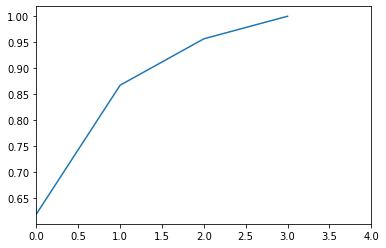

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,4)